Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.

Precision
1 Вынесение судебного приговора (лучше отпустить виновного, чем посадить невиновного)
2 Расчет вероятности успешной высодки на планету (ложные положительные, череваты большими убытками и человеческими жертвами)

Recall
1 Выявление мошеннических операций по счету (лучше разблокировать счет после проверки, чем пропустить реального мошенника)
2 Выявление потенциально опасной продукции (лучше изъять с продажи безобидный продукт, чем выплачивать страховки и нести убытки при выпуске вредоносного продукта)


Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

Для того чтобы можно было более тонко настроить, какой из параметров для нас более важен.

## Начало курсового проекта ##

Задача

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

Наименование файлов с данными

course_project_train.csv - обучающий датасет
course_project_test.csv - тестовый датасет

Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

Метрика качества

F1-score (sklearn.metrics.f1_score)

Требования к решению

Целевая метрика

F1 > 0.5
Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)
Решение должно содержать

Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv
Рекомендации для файла с кодом (ipynb)

Файл должен содержать заголовки и комментарии (markdown)
Повторяющиеся операции лучше оформлять в виде функций
Не делать вывод большого количества строк таблиц (5-10 достаточно)
По возможности добавлять графики, описывающие данные (около 3-5)
Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
Весь проект должен быть в одном скрипте (файл ipynb).
Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.
Сроки сдачи

Cдать проект нужно в течение 5 дней после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.float_format = '{:.2f}'.format
FIGSIZE = (10, 15)

In [2]:
# input
DATASET_PATH = 'course_project_train.csv'
TARGET = 'Credit Default'
TEST_DATASET_PATH = 'course_project_test.csv'
# output
PREP_DATASET_PATH = 'EKalmina_predictions.csv'

## Описание датасета##

- Home Ownership - домовладение (категория)
- Annual Income - годовой доход
- Years in current job - количество лет на текущем месте работы (преобразовать в численный формат)
- Tax Liens - налоговые обременения
- Number of Open Accounts - количество открытых счетов
- Years of Credit History - количество лет кредитной истории
- Maximum Open Credit - наибольший открытый кредит
- Number of Credit Problems - количество проблем с кредитом
- Months since last delinquent - количество месяцев с последней просрочки платежа
- Bankruptcies - банкротства
- Purpose - цель кредита (категория)
- Term - срок кредита (категория)
- Current Loan Amount - текущая сумма кредита 
- Current Credit Balance - текущий кредитный баланс
- Monthly Debt - ежемесячный долг
- Сredit Score ?
- Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
df_train = pd.read_csv(DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.00,NaN,0.00,11.00,26.30,685960.00,1.00,nan,1.00,debt consolidation,Short Term,99999999.00,47386.00,7914.00,749.00,0
1,Own Home,1025487.00,10+ years,0.00,15.00,15.30,1181730.00,0.00,nan,0.00,debt consolidation,Long Term,264968.00,394972.00,18373.00,737.00,1
2,Home Mortgage,751412.00,8 years,0.00,11.00,35.00,1182434.00,0.00,nan,0.00,debt consolidation,Short Term,99999999.00,308389.00,13651.00,742.00,0
3,Own Home,805068.00,6 years,0.00,8.00,22.50,147400.00,1.00,nan,1.00,debt consolidation,Short Term,121396.00,95855.00,11338.00,694.00,0
4,Rent,776264.00,8 years,0.00,13.00,13.60,385836.00,1.00,nan,0.00,debt consolidation,Short Term,125840.00,93309.00,7180.00,719.00,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [6]:
df_train.shape

(7500, 17)

In [7]:
df_train[TARGET].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [8]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.00,1366391.72,845339.20,164597.00,844341.00,1168386.00,1640137.00,10149344.00
Tax Liens,7500.00,0.03,0.27,0.00,0.00,0.00,0.00,7.00
Number of Open Accounts,7500.00,11.13,4.91,2.00,8.00,10.00,14.00,43.00
Years of Credit History,7500.00,18.32,7.04,4.00,13.50,17.00,21.80,57.70
Maximum Open Credit,7500.00,945153.73,16026216.67,0.00,279229.50,478159.00,793501.50,1304726170.00
Number of Credit Problems,7500.00,0.17,0.50,0.00,0.00,0.00,0.00,7.00
Months since last delinquent,3419.00,34.69,21.69,0.00,16.00,32.00,50.00,118.00
Bankruptcies,7486.00,0.12,0.35,0.00,0.00,0.00,0.00,4.00
Current Loan Amount,7500.00,11873177.45,31926122.97,11242.00,180169.00,309573.00,519882.00,99999999.00
Current Credit Balance,7500.00,289833.24,317871.38,0.00,114256.50,209323.00,360406.25,6506797.00


## Графики

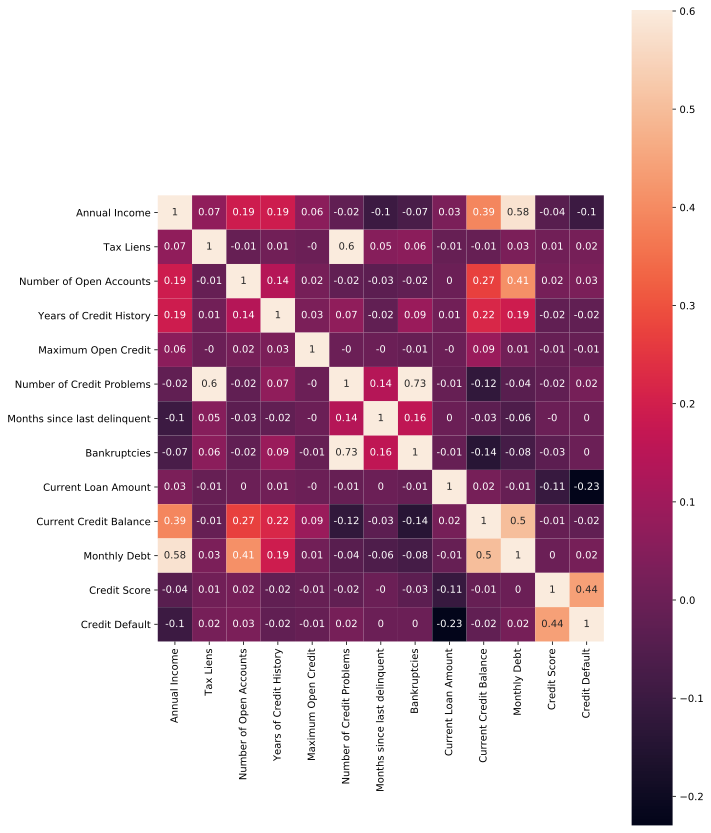

In [9]:
corrmat = df_train.corr().round(2)
plt.subplots(figsize=FIGSIZE)
sns.heatmap(corrmat, vmax=0.6, square=True, annot=True)

Уже очевидна большая корреляция с кредитным скорингом.
А также корреляция между числом открытых счетов, и ежемесячным долгом..

### Приведение типов и чистка пропусков

In [10]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [11]:
df_test['Years in current job'].unique()

array(['4 years', '1 year', '3 years', '10+ years', '6 years', '5 years',
       '< 1 year', '2 years', '9 years', '8 years', '7 years', nan],
      dtype=object)

In [12]:
def missing_values_clean(df):
    
    if pd.api.types.is_categorical_dtype(df['Years in current job']):
        df['Years in current job'] = df['Years in current job'].cat.add_categories(['0'])
    
    df['Years in current job'] = df['Years in current job'].fillna('0')

    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

    df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
    
    return df

In [13]:
def years_in_current_job_clean(years):
    if isinstance(years, str):
        years = years.rstrip('s').rstrip('year').rstrip().rstrip('+')
        if years.startswith('<'):
            years = '0'   
    return years

In [14]:
def years_clean(df):
    df['Years in current job'] = df['Years in current job'].map(years_in_current_job_clean)
    df['Years in current job'] = df['Years in current job'].astype(float)
    return df

In [15]:
df_train = missing_values_clean(df_train)
df_test = missing_values_clean(df_test)

In [16]:
annual_mode = df_train['Annual Income'].mode()[0]
credit_mode = df_train['Credit Score'].mode()[0]

In [17]:
df_train['Annual Income'] = df_train['Annual Income'].fillna(annual_mode)
df_test['Annual Income'] = df_test['Annual Income'].fillna(annual_mode)
df_train['Credit Score'] = df_train['Credit Score'].fillna(credit_mode)
df_test['Credit Score'] = df_test['Credit Score'].fillna(credit_mode)

In [18]:
df_train = years_clean(df_train)
df_test = years_clean(df_test)

In [19]:
df_train['Years in current job'].unique()

array([ 0., 10.,  8.,  6.,  7.,  5.,  1.,  4.,  3.,  2.,  9.])

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Разбиваем категориальные признаки

In [21]:
def dummy_df(df):
    for cat_colname in df.select_dtypes(include='object').columns[:]:
        df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
    return df

In [22]:
df_train_dummy  = dummy_df(df_train) 

In [23]:
df_train_dummy

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Own Home,482087.00,0.00,0.00,11.00,26.30,685960.00,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
1,Own Home,1025487.00,10.00,0.00,15.00,15.30,1181730.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
2,Home Mortgage,751412.00,8.00,0.00,11.00,35.00,1182434.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
3,Own Home,805068.00,6.00,0.00,8.00,22.50,147400.00,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
4,Rent,776264.00,8.00,0.00,13.00,13.60,385836.00,1.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.00,0.00,0.00,3.00,8.50,107866.00,0.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,1
7496,Home Mortgage,1533984.00,1.00,0.00,10.00,26.50,686312.00,0.00,43.00,0.00,...,0,0,0,0,0,0,0,0,1,0
7497,Rent,1878910.00,6.00,0.00,12.00,32.10,1778920.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
7498,Home Mortgage,969475.00,0.00,0.00,21.00,26.50,1141250.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1


In [24]:
df_test_dummy = dummy_df(df_test)

In [25]:
col_train = set(df_train_dummy.columns)
col_test = set(df_test_dummy.columns)
col_train ^ col_test

{'Credit Default', 'Purpose_renewable energy'}

In [26]:
df_test_dummy['Purpose_renewable energy'] = 0

In [27]:
col_test_list = df_test_dummy.columns.tolist()

In [28]:
col_test_list = col_test_list[:30] + col_test_list[-1:] + col_test_list[30:-1]
df_test_dummy = df_test_dummy[col_test_list]

In [29]:
df_test_dummy

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Rent,969475.00,4.00,0.00,9.00,12.50,220968.00,0.00,70.00,0.00,...,0,0,0,0,0,0,0,0,0,1
1,Rent,231838.00,1.00,0.00,6.00,32.70,55946.00,0.00,8.00,0.00,...,0,0,0,0,0,0,0,0,0,1
2,Home Mortgage,1152540.00,3.00,0.00,10.00,13.70,204600.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
3,Home Mortgage,1220313.00,10.00,0.00,16.00,17.00,456302.00,0.00,70.00,0.00,...,0,0,0,0,0,0,0,0,0,1
4,Home Mortgage,2340952.00,6.00,0.00,11.00,23.60,1207272.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.00,10.00,0.00,14.00,29.10,559152.00,1.00,68.00,1.00,...,0,0,0,0,0,0,0,0,0,1
2496,Home Mortgage,969475.00,2.00,0.00,15.00,17.00,1737780.00,0.00,77.00,0.00,...,0,0,0,0,0,0,0,0,0,1
2497,Home Mortgage,1171806.00,2.00,0.00,48.00,12.80,1706430.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
2498,Rent,723520.00,10.00,0.00,14.00,28.80,945780.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1


## поиск выбросов

In [30]:
df_train.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,1283991.81,5.59,0.03,11.13,18.32,945153.73,0.17,15.82,0.12,11873177.45,289833.24,18314.45,1065.75,0.28
std,769511.26,3.75,0.27,4.91,7.04,16026216.67,0.50,22.65,0.35,31926122.97,317871.38,11926.76,1437.91,0.45
min,164597.00,0.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,11242.00,0.00,0.00,585.00,0.00
25%,931133.00,2.00,0.00,8.00,13.50,279229.50,0.00,0.00,0.00,180169.00,114256.50,10067.50,718.00,0.00
50%,989130.50,6.00,0.00,10.00,17.00,478159.00,0.00,0.00,0.00,309573.00,209323.00,16076.50,738.00,0.00
75%,1499974.00,10.00,0.00,14.00,21.80,793501.50,0.00,29.00,0.00,519882.00,360406.25,23818.00,740.00,1.00
max,10149344.00,10.00,7.00,43.00,57.70,1304726170.00,7.00,118.00,4.00,99999999.00,6506797.00,136679.00,7510.00,1.00


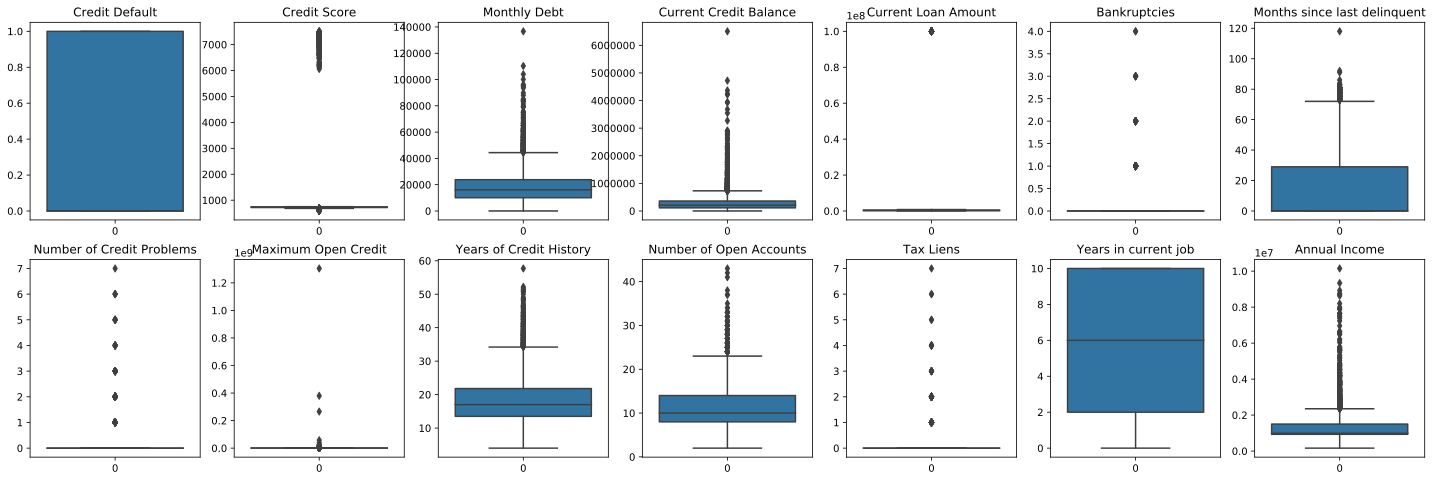

In [31]:
FIGSIZE = (25,8)
titles = df_train.select_dtypes(include='number').columns.to_list()
fig, axes = plt.subplots(2, 7, figsize=FIGSIZE)
for row in axes:
    for col in row:
        title = titles.pop()
        sns.boxplot(data=df_train[title], ax=col)
        col.set_title(title)

plt.show()

In [32]:
df_train[df_train['Maximum Open Credit'] > 40000000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
44,Have Mortgage,1334256.00,10.00,0.00,17.00,15.40,380052288.00,1.00,35.00,0.00,take a trip,Short Term,33110.00,656450.00,34357.00,729.00,0
617,Home Mortgage,969475.00,3.00,0.00,13.00,27.50,1304726170.00,0.00,0.00,0.00,debt consolidation,Short Term,529892.00,1126814.00,5492.00,740.00,0
2023,Rent,1342825.00,10.00,0.00,12.00,16.30,57562560.00,0.00,0.00,0.00,other,Short Term,166826.00,944547.00,9176.00,749.00,0
2617,Home Mortgage,3217802.00,10.00,0.00,12.00,35.50,265512874.00,0.00,0.00,0.00,other,Short Term,50116.00,1834450.00,20272.00,750.00,0
2763,Home Mortgage,3377440.00,10.00,0.00,11.00,23.20,40923894.00,0.00,59.00,0.00,home improvements,Short Term,99999999.00,1908550.00,5770.00,743.00,0


In [33]:
df_train_dummy[df_train_dummy['Maximum Open Credit'] == 0]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
8,Home Mortgage,969475.00,5.00,0.00,17.00,15.70,0.00,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
91,Rent,601369.00,10.00,0.00,6.00,16.90,0.00,0.00,14.00,0.00,...,0,0,0,0,0,0,0,0,0,1
196,Rent,815157.00,7.00,0.00,3.00,8.80,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
294,Home Mortgage,2033931.00,7.00,0.00,6.00,21.10,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
309,Rent,1245792.00,3.00,0.00,5.00,22.40,0.00,0.00,58.00,0.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,Home Mortgage,969475.00,8.00,0.00,10.00,13.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
6851,Home Mortgage,2251728.00,10.00,0.00,8.00,15.40,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
7014,Home Mortgage,1223771.00,5.00,0.00,9.00,24.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
7124,Rent,969475.00,1.00,0.00,4.00,11.00,0.00,0.00,50.00,0.00,...,0,0,0,0,0,0,0,0,0,1


In [34]:
def clean_max(df): 
    df['Maximum Open Credit']=df['Maximum Open Credit'].mask(df['Maximum Open Credit']==0).fillna(df['Current Loan Amount'])
    return df

In [35]:
df_train_dummy = clean_max(df_train_dummy)
df_test_dummy = clean_max(df_test_dummy)

In [36]:
df_train_dummy[8:10]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
8,Home Mortgage,969475.00,5.00,0.00,17.00,15.70,129734.00,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
9,Home Mortgage,969475.00,1.00,0.00,10.00,24.60,511302.00,0.00,6.00,0.00,...,0,0,0,0,0,0,0,0,1,0


Maximum Open Credit - наибольший открытый кредит (есть сомнения по излишне высоким данным,
                                                 можно в дальнейшем попробовать убрать излишне высокие заменив 
                                                  на текущий Current Loan Amount + Current Loan Balance )
Current Loan Amount - текущая сумма кредита
Current Credit Balance - текущий кредитный баланс  Заменить излишне высокие
Monthly Debt - ежемесячный долг  (сравнить, проверить излишне высокие)
Сredit Score (проверить завышенные, возможно поделить на десять)